# Fuse classification

In [2]:
# Imports
import os
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

## Data analysis

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


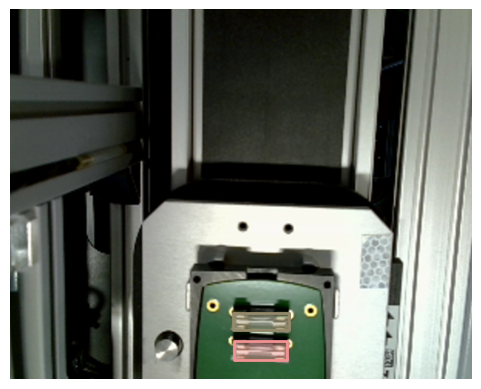

In [14]:
# Create a COCO object
coco = COCO('./data/detection/fuse_dataset_coco.json')

# Get the annotations for this image
annotations = coco.loadAnns(coco.getAnnIds(imgIds=11))

# Get the image info
img_info = coco.loadImgs(11)[0]
height, width = img_info['height'], img_info['width']
file_name = img_info['file_name']
img_path = os.path.join('./data/detection', file_name)
image = plt.imread(img_path)

# Load and display instance annotations
plt.imshow(image); plt.axis('off')
coco.showAnns(annotations, draw_bbox=True)
plt.show()

## Model training

In [16]:
# Load a YOLOv8 model for pose estimation
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Training params
epochs = 20 # All data is sent 'epoch' times through the network
image_size = 640 # All images are resized to this size before entering the network

# Train the model
results = model.train(data='./data/detection/fuse_dataset.yaml', epochs=epochs, imgsz=image_size, save_dir="C:/Users/matth/OneDrive - KU Leuven/Python_Projects/fuse_detection/data")

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.14 🚀 Python-3.10.11 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A500 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=./data/detection/fuse_dataset.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

train: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 10005.50it/s]

train: New cache created: C:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to ..\runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to ..\runs\detect\train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.48G      2.716      4.955      1.655         28        640: 100%|██████████| 1/1 [00:10<00:00, 10.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         10         15    0.00106      0.133   0.000609   0.000272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.45G      2.455      5.005      1.723         20        640: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         10         15    0.00108      0.133   0.000617   0.000367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.44G      2.414      5.071      1.648         25        640: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all         10         15     0.0011      0.133   0.000639   0.000379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.44G      2.614        5.1      1.819         16        640: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all         10         15    0.00167        0.2    0.00105   0.000468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.44G      2.552      4.587      1.596         32        640: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all         10         15    0.00171        0.2    0.00108   0.000337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.45G      2.296      4.833      1.655         24        640: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]

                   all         10         15    0.00227      0.267    0.00159   0.000803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.47G      2.383      4.494      1.626         21        640: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all         10         15    0.00569      0.667    0.00716    0.00278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.47G      2.021      4.162      1.259         29        640: 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all         10         15     0.0085          1     0.0131    0.00578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.47G      1.769      4.177      1.208         20        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all         10         15    0.00791      0.933     0.0129     0.0065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.47G      2.064      4.294      1.171         18        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all         10         15    0.00786      0.933      0.013    0.00626


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.47G      1.707       3.69     0.9599         15        640: 100%|██████████| 1/1 [00:10<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         10         15    0.00771      0.933     0.0132    0.00693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.47G      1.739      3.719      1.082         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all         10         15    0.00779      0.933     0.0133    0.00784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.47G      1.683       2.97      1.051         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         10         15    0.00781      0.933     0.0131    0.00739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.47G      1.711      3.075      1.128         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all         10         15    0.00831          1     0.0147    0.00799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.47G      1.579      2.695      1.094         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         10         15    0.00842          1     0.0145    0.00791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.47G      1.587      2.503      1.001         14        640: 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all         10         15    0.00851          1     0.0146    0.00813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.47G      1.476      2.799      1.036         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all         10         15    0.00852          1     0.0146    0.00873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.47G      1.314      2.434     0.9816         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]

                   all         10         15    0.00852          1     0.0146    0.00873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.47G      1.325      2.977     0.9707         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all         10         15    0.00861          1     0.0144     0.0083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.47G      1.558      2.366       1.06         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all         10         15    0.00861          1     0.0144     0.0083



20 epochs completed in 0.010 hours.
Optimizer stripped from ..\runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from ..\runs\detect\train2\weights\best.pt, 6.2MB

Validating ..\runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.14 🚀 Python-3.10.11 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A500 Laptop GPU, 4096MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]


                   all         10         15    0.00849          1     0.0146    0.00864
             Two fuses         10         15    0.00849          1     0.0146    0.00864
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to ..\runs\detect\train2


## Model validation

In [18]:
# Load a pretrained YOLOv8n model
model = YOLO('../runs/detect/train2/weights/best.pt')

In [22]:
# Validate the model
metrics = model.val()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.11 torch-2.1.1+cu121 CUDA:0 (NVIDIA RTX A500 Laptop GPU, 4096MiB)


val: Scanning C:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.67s/it]


                   all         10         15    0.00855          1     0.0147    0.00868
             Two fuses         10         15    0.00855          1     0.0147    0.00868
Speed: 6.3ms preprocess, 48.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to ..\runs\detect\val


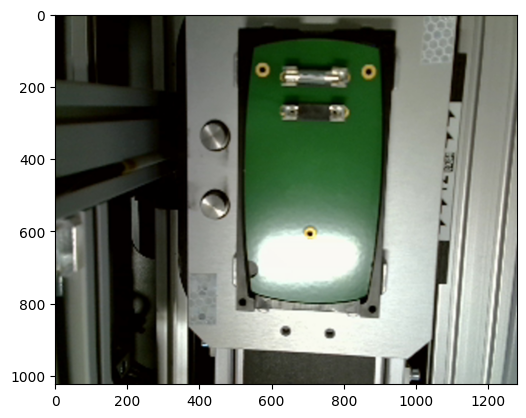

image 1/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\0710e3e6-Picture_6.jpg: 512x640 (no detections), 123.6ms


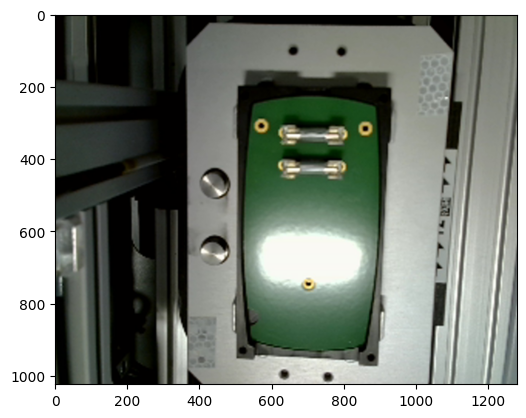

image 2/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\346a6b4a-Picture_11.jpg: 512x640 (no detections), 115.5ms


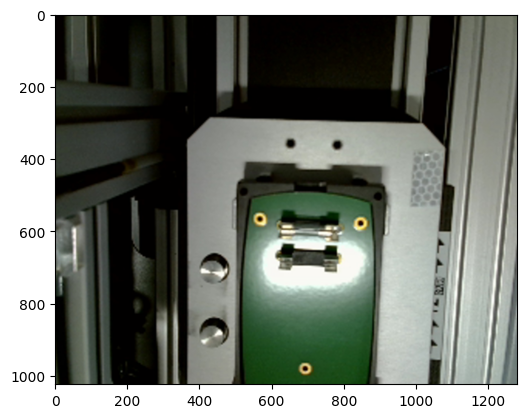

image 3/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\348c5d8b-Picture_8.jpg: 512x640 (no detections), 44.9ms


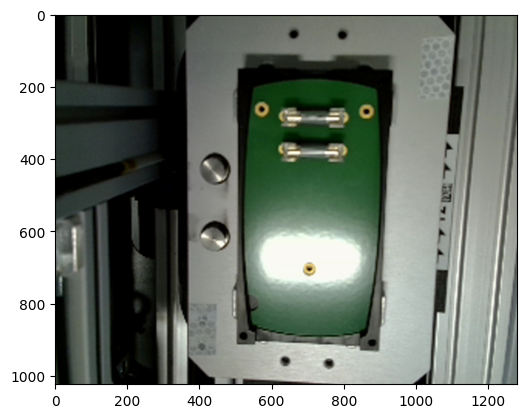

image 4/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\593ee0a6-Picture_15.jpg: 512x640 (no detections), 46.5ms


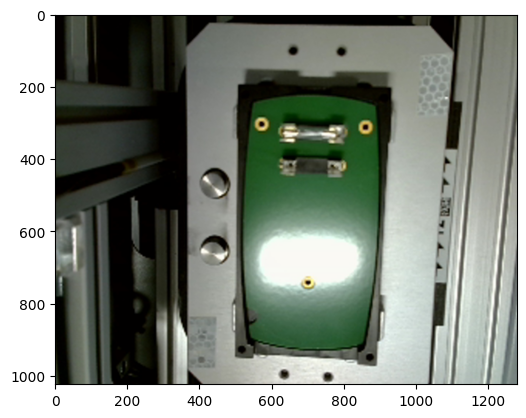

image 5/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\76546a6b-Picture_10.jpg: 512x640 (no detections), 45.9ms


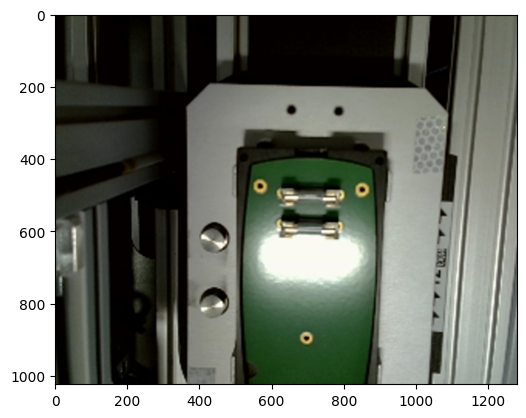

image 6/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\87a1ad33-Picture_14.jpg: 512x640 (no detections), 45.8ms


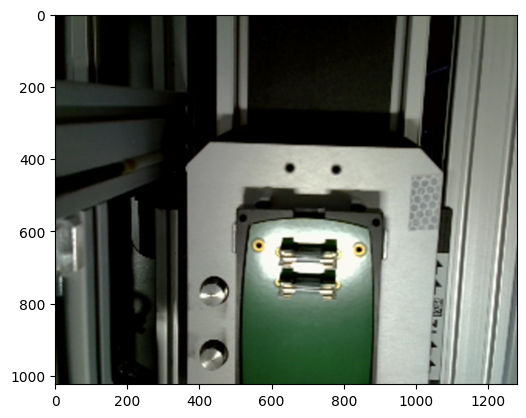

image 7/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\913549e3-Picture_13.jpg: 512x640 (no detections), 46.0ms


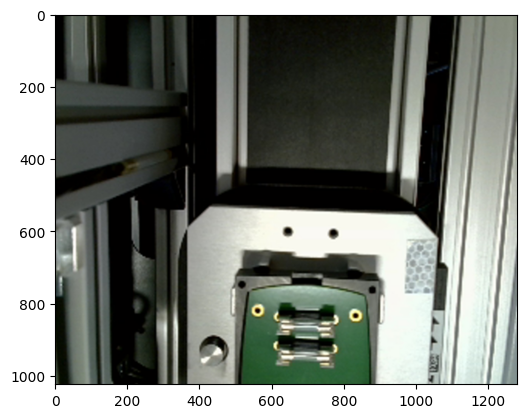

image 8/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\b42cefcb-Picture_12.jpg: 512x640 (no detections), 46.7ms


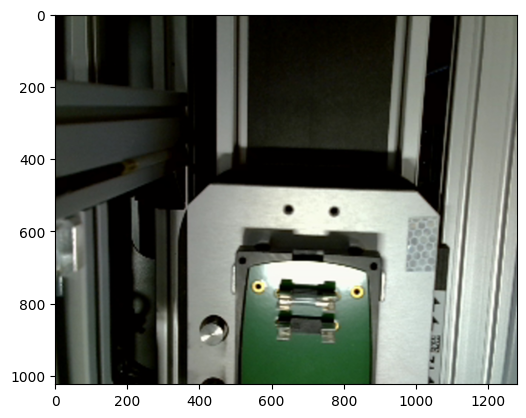

image 9/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\d13df2a5-Picture_9.jpg: 512x640 (no detections), 116.4ms


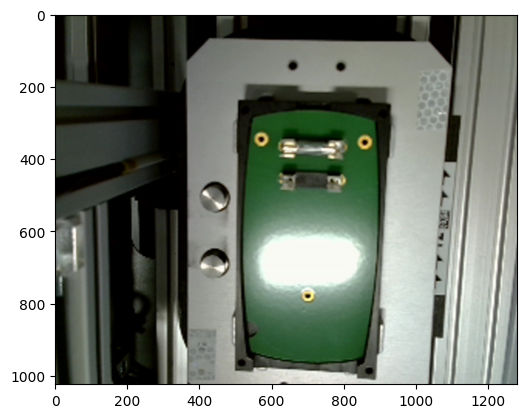

image 10/10 c:\Users\matth\OneDrive - KU Leuven\Python_Projects\fuse_detection\data\detection\images\ea037e28-Picture_7.jpg: 512x640 (no detections), 43.9ms
Speed: 6.1ms preprocess, 67.5ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 640)


In [21]:
# Predict with the model
results = model('./data/detection/images', stream=True)  # predict on an image

# Plot results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(im)
    plt.show()